In [1]:
import os
import argparse
import numpy as np
import astropy
from astropy.io import fits
import matplotlib
from matplotlib import pyplot as plt
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u
from astropy import wcs
import math
import sys
%matplotlib inline
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [2]:
my_i_cube='Jos_Maser_StokesI_V3.fits'

In [3]:
datacube = fits.open(my_i_cube)
data = datacube[0].data
header = datacube[0].header
data.shape

(3842, 133, 134)

In [4]:
print(datacube[0].header['CUNIT3'])
rp = datacube[0].header['CRPIX3']
rf = datacube[0].header['CRVAL3']
df = datacube[0].header['CDELT3']
nf = datacube[0].header['NAXIS3']
xvals = rf + df*(np.arange(nf)-rp)
#xvals are the frequency in Hz np.subtract(xvals,1.66555e+09)
xvals=xvals[0:2999]
#print xvals

Hz


In [5]:
#Convert the frequency to velocity and make LSR Correction.  Get LSR sky frequency from 
#https://www.narrabri.atnf.csiro.au/observing/obstools/velo.html
#OH maser at rest frequency is 18cm or 0.18m wavelength
vels=np.multiply(np.subtract(1.665402e+09,xvals),0.180012)
#Correct for m/s into km/s
vels=np.divide(vels,1000)
#Reduce the number velocities to make the plot easier to read.
#vels=vels[500:999]
#print vels

In [6]:
ra="16:50:14.80"
dec="-44:42:26.0"
c = SkyCoord(ra, dec, unit=(u.hourangle, u.deg))

In [7]:
w = wcs.WCS(header, naxis=2)
xpix,ypix=c.to_pixel(w,origin=0,mode='wcs')
xpix=int(xpix)
ypix=int(ypix)

print(xpix)
print(ypix)

67
66


In [8]:
signal=[]
for x in range(0, 2998):
    value = np.nanmean(data[x,ypix:ypix+1,xpix:xpix+1])
    #print value
    signal.append(value)

In [9]:
max_signal=np.nan_to_num(signal)
mean_sig=np.nanmean(signal)
max_value = np.amax(max_signal)
print(max_value)
#Determine the spectral RMS
RMS=np.nanstd(signal[1000:1500])
RMS2=str(round(RMS,2))
print(RMS)
print(mean_sig)  

9.174
0.03163079
0.08297525


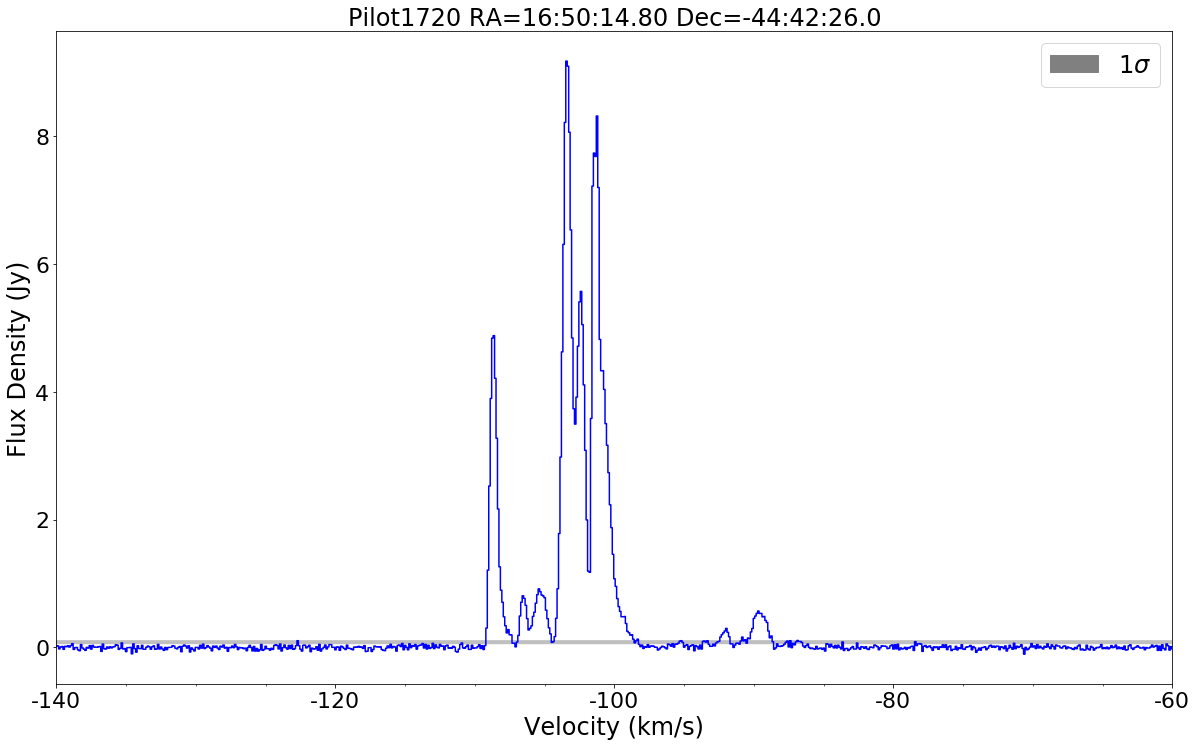

In [10]:
import matplotlib.patches as mpatches
#Set the minor axis counters
majorLocator = MultipleLocator(20)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(5)
        
#Make a spectra        
bigfig=plt.figure(figsize=(20,12))
ax1=bigfig.add_subplot(111)
ax1.step(vels[0:2998],signal[0:2998],color='blue')
#ax1.step(xvals[0:2000],signal[0:2000],color='red')
ax1.set_title("Pilot1720"+" RA="+ra+" Dec="+dec, fontsize=24)
ax1.set_xlabel("Velocity (km/s)",fontsize=24)
ax1.set_xlim(-140,-60)
ax1.set_ylabel("Flux Density (Jy)",fontsize=24)
ax1.tick_params(labelsize=22, labelbottom=True)
ax1.ticklabel_format(useOffset=False)
ax1.xaxis.set_major_locator(majorLocator)
ax1.xaxis.set_major_formatter(majorFormatter)
plum_patch = mpatches.Patch(color='grey', label='1$\sigma$')
ax1.fill_between(vels[0:3000], mean_sig-RMS, mean_sig+RMS, facecolor='grey', alpha=0.5)
ax1.legend(handles=[plum_patch],  loc=1,fontsize=24)

# for the minor ticks, use no labels; default NullFormatter
ax1.xaxis.set_minor_locator(minorLocator)

#Save the figure.     
#bigfig.savefig("Third_Maser_Continuum.png")

In [11]:
my_v_cube='Jo_maser.fits'

In [12]:
datacubev = fits.open(my_v_cube)
datav = datacubev[0].data
headerv = datacubev[0].header
datav.shape

(3842, 133, 134)

In [13]:
print(datacubev[0].header['CUNIT3'])
rp = datacubev[0].header['CRPIX3']
rf = datacubev[0].header['CRVAL3']
df = datacubev[0].header['CDELT3']
nf = datacubev[0].header['NAXIS3']
xvalsv = rf + df*(np.arange(nf)-rp)
#xvals are the frequency in Hz np.subtract(xvals,1.66555e+09)
#xvalsv=xvalsv[0:2999]
#print xvals

Hz


In [14]:
wv = wcs.WCS(headerv, naxis=2)
xpixv,ypixv=c.to_pixel(wv,origin=0,mode='wcs')
xpixv=int(xpixv)
ypixv=int(ypixv)

print(xpixv)
print(ypixv)

67
66


In [15]:
signalv=[]
for x in range(0, 2998):
    value = np.nanmean(datav[x,ypixv:ypixv+1,xpixv:xpixv+1])
    #print value
    signalv.append(value)

In [16]:
max_signalv=np.nan_to_num(signalv)
mean_sigv=np.nanmean(signalv)
max_valuev = np.amax(max_signalv)
print(max_valuev)
#Determine the spectral RMS
RMSv=np.nanstd(signalv[1000:1500])
RMS2v=str(round(RMSv,2))
print(RMSv)
print(mean_sigv) 

7.825184
0.03051607
0.0116138365


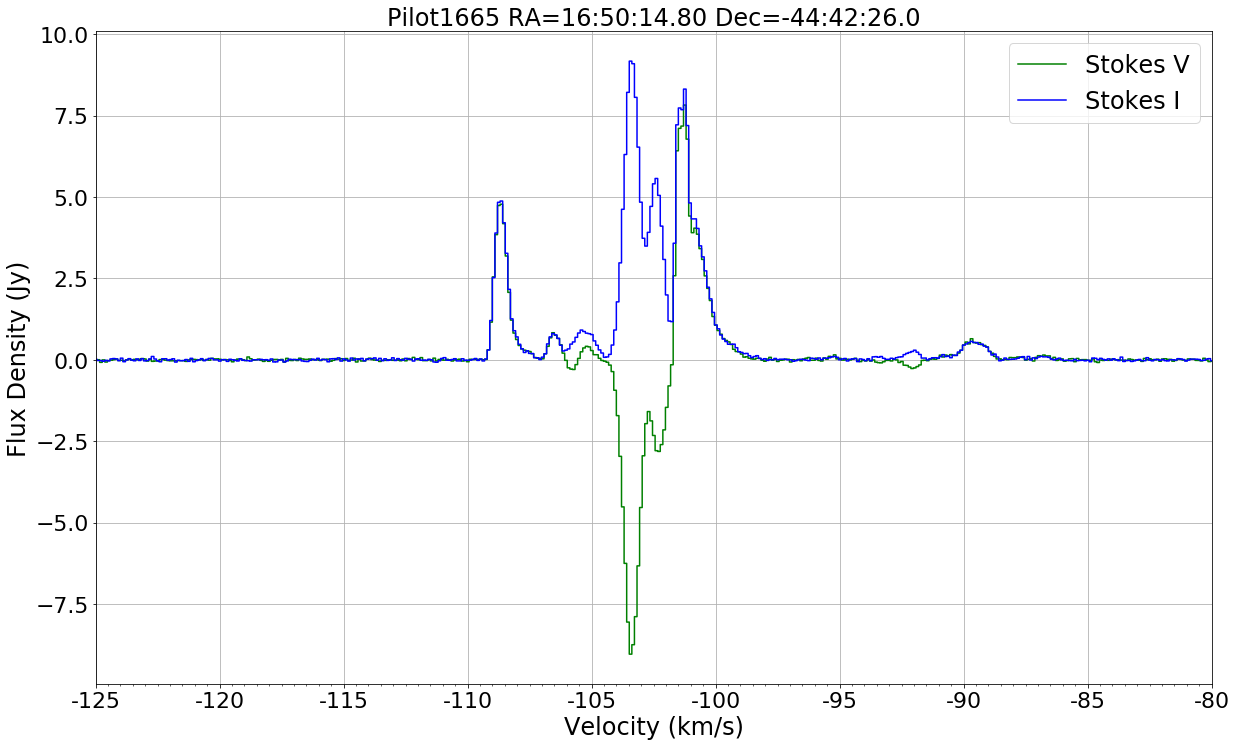

In [17]:
import matplotlib.patches as mpatches
#Set the minor axis counters
majorLocator = MultipleLocator(5)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(0.5)
        
#Make a spectra        
bigfig=plt.figure(figsize=(20,12))
ax1=bigfig.add_subplot(111)
ax1.step(vels[0:2239],signalv[0:2239],color='green',label='Stokes V')
ax1.step(vels[0:2239],signal[0:2239],color='blue', label='Stokes I')
#ax1.step(xvals[0:2000],signal[0:2000],color='red')
ax1.set_title("Pilot1665"+" RA="+ra+" Dec="+dec, fontsize=24)
ax1.set_xlabel("Velocity (km/s)",fontsize=24)
ax1.set_xlim(-125,-80)
ax1.set_ylabel("Flux Density (Jy)",fontsize=24)
ax1.tick_params(labelsize=22, labelbottom=True)
ax1.ticklabel_format(useOffset=False)
ax1.xaxis.set_major_locator(majorLocator)
ax1.xaxis.set_major_formatter(majorFormatter)
#plum_patch = mpatches.Patch(color='grey')
#ax1.fill_between(vels[0:3000], mean_sig-RMS, mean_sig+RMS, facecolor='grey', alpha=0.5)
ax1.legend(fontsize=24)
plt.grid(True)

# for the minor ticks, use no labels; default NullFormatter
ax1.xaxis.set_minor_locator(minorLocator)

#Save the figure.     
bigfig.savefig("Circular_Polarisation_Jo_maser.png")

In [18]:
mydata_v=zip(vels[0:2239],signalv[0:2239])

In [19]:
rhcp=np.divide(np.add(signal,signalv),2)
#lhcp=(signal-signalv)/2

In [20]:
lhcp=np.divide(np.subtract(signal,signalv),2)

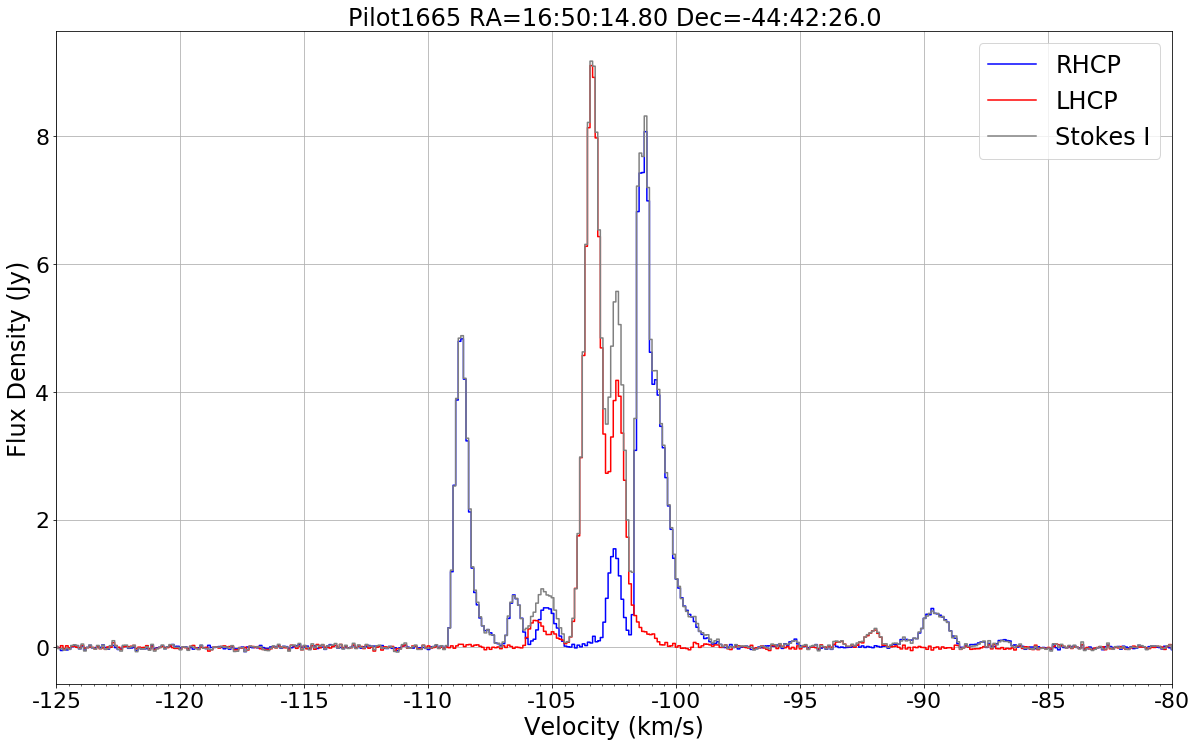

In [21]:
import matplotlib.patches as mpatches
#Set the minor axis counters
majorLocator = MultipleLocator(5)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(0.5)
        
#Make a spectra        
bigfig=plt.figure(figsize=(20,12))
ax1=bigfig.add_subplot(111)
ax1.step(vels[0:2239],rhcp[0:2239],color='blue',label='RHCP')
ax1.step(vels[0:2239],lhcp[0:2239],color='red',label='LHCP')
ax1.step(vels[0:2239],signal[0:2239],color='grey', label='Stokes I')
#ax1.step(xvals[0:2000],signal[0:2000],color='red')
ax1.set_title("Pilot1665"+" RA="+ra+" Dec="+dec, fontsize=24)
ax1.set_xlabel("Velocity (km/s)",fontsize=24)
ax1.set_xlim(-125,-80)
ax1.set_ylabel("Flux Density (Jy)",fontsize=24)
ax1.tick_params(labelsize=22, labelbottom=True)
ax1.ticklabel_format(useOffset=False)
ax1.xaxis.set_major_locator(majorLocator)
ax1.xaxis.set_major_formatter(majorFormatter)
#plum_patch = mpatches.Patch(color='grey')
#ax1.fill_between(vels[0:3000], mean_sig-RMS, mean_sig+RMS, facecolor='grey', alpha=0.5)
ax1.legend(fontsize=24)
plt.grid(True)

# for the minor ticks, use no labels; default NullFormatter
ax1.xaxis.set_minor_locator(minorLocator)

#Save the figure.     
bigfig.savefig("Circular_Polarisation_Jo_maser_RLHCP.png")

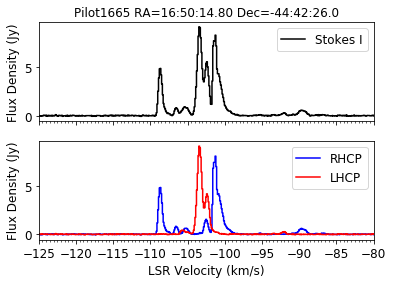

In [22]:
import matplotlib.patches as mpatches
#Set the minor axis counters
#majorLocator = MultipleLocator(5)
#majorFormatter = FormatStrFormatter('%d')
#minorLocator = MultipleLocator(0.5)

#bigfig=plt.figure(figsize=(20,12))
#Make a spectra        
fig, axs = plt.subplots(2, sharex=True, sharey=True)
#axs[0]=bigfig.add_subplot(211)
#ax1.step(vels[0:2239],rhcp[0:2239],color='blue',label='RHCP')
#ax1.step(vels[0:2239],lhcp[0:2239],color='red',label='LHCP')
axs[0].step(vels[0:2239],signal[0:2239],color='black', label='Stokes I')
#ax1.step(xvals[0:2000],signal[0:2000],color='red')
axs[0].set_title("Pilot1665"+" RA="+ra+" Dec="+dec, fontsize=12)
#ax1.set_xlabel("Velocity (km/s)",fontsize=24)
axs[0].set_xlim(-125,-80)
axs[0].set_ylabel("Flux Density (Jy)",fontsize=12)
axs[0].tick_params(labelsize=12, labelbottom=False)
#axs[0].ticklabel_format(useOffset=False)
#axs[0].xaxis.set_major_locator(majorLocator)
#axs[0].xaxis.set_major_formatter(majorFormatter)
#plum_patch = mpatches.Patch(color='grey')
#ax1.fill_between(vels[0:3000], mean_sig-RMS, mean_sig+RMS, facecolor='grey', alpha=0.5)
axs[0].legend(fontsize=12)
#plt.grid(True)

#ax2=bigfig.add_subplot(212)
axs[1].step(vels[0:2239],rhcp[0:2239],color='blue',label='RHCP')
axs[1].step(vels[0:2239],lhcp[0:2239],color='red',label='LHCP')
#ax1.step(vels[0:2239],signal[0:2239],color='grey', label='Stokes I')
#ax1.step(xvals[0:2000],signal[0:2000],color='red')
#ax1.set_title("Pilot1665"+" RA="+ra+" Dec="+dec, fontsize=24)
axs[1].set_xlabel("LSR Velocity (km/s)",fontsize=12)
axs[1].set_xlim(-125,-80)
axs[1].set_ylabel("Flux Density (Jy)",fontsize=12)
axs[1].tick_params(labelsize=12, labelbottom=True)
#axs[1].ticklabel_format(useOffset=False)
#axs[1].xaxis.set_major_locator(majorLocator)
#axs[1].xaxis.set_major_formatter(majorFormatter)
#plum_patch = mpatches.Patch(color='grey')
#ax1.fill_between(vels[0:3000], mean_sig-RMS, mean_sig+RMS, facecolor='grey', alpha=0.5)
axs[1].legend(fontsize=12)
#plt.grid(True)

# for the minor ticks, use no labels; default NullFormatter
axs[1].xaxis.set_minor_locator(minorLocator)

#for ax in axs:
#    ax.label_outer()
#Save the figure.     
fig.savefig("Circular_Polarisation_RASP_Maser_Plot.pdf", dpi=300)

In [23]:
import csv
from operator import itemgetter, attrgetter, methodcaller
Cdata_I = np.genfromtxt('1665/C_Stokes_I.csv', delimiter=',', names=['x', 'y'])
Cfreq_I=Cdata_I['x']
Csignal_I=Cdata_I['y']

In [24]:
Cdata_V = np.genfromtxt('1665/C_Stokes_V.csv', delimiter=',', names=['x', 'y'])
Cfreq_V=Cdata_V['x']
Csignal_V=Cdata_V['y']

In [25]:
C_rhcp=np.divide(np.add(Csignal_I[0:1490],Csignal_V[0:1490]),2)
C_lhcp=np.divide(np.subtract(Csignal_I[0:1490],Csignal_V[0:1490]),2)

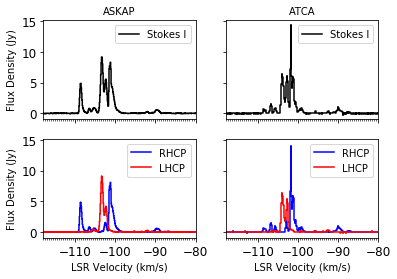

In [26]:
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
#axs[0]=bigfig.add_subplot(211)
#ax1.step(vels[0:2239],rhcp[0:2239],color='blue',label='RHCP')
#ax1.step(vels[0:2239],lhcp[0:2239],color='red',label='LHCP')
axs[0,0].step(vels[0:2239],signal[0:2239],color='black', label='Stokes I')
#ax1.step(xvals[0:2000],signal[0:2000],color='red')
axs[0,0].set_title("ASKAP", fontsize=10)
#ax1.set_xlabel("Velocity (km/s)",fontsize=24)
axs[0,0].set_xlim(-118,-80)
axs[0,0].set_ylabel("Flux Density (Jy)",fontsize=10)
axs[0,0].tick_params(labelsize=12, labelbottom=False)
#axs[0].ticklabel_format(useOffset=False)
#axs[0].xaxis.set_major_locator(majorLocator)
#axs[0].xaxis.set_major_formatter(majorFormatter)
#plum_patch = mpatches.Patch(color='grey')
#ax1.fill_between(vels[0:3000], mean_sig-RMS, mean_sig+RMS, facecolor='grey', alpha=0.5)
axs[0,0].legend(fontsize=10)
#plt.grid(True)

#ax2=bigfig.add_subplot(212)
axs[1,0].step(vels[0:2239],rhcp[0:2239],color='blue',label='RHCP')
axs[1,0].step(vels[0:2239],lhcp[0:2239],color='red',label='LHCP')
#ax1.step(vels[0:2239],signal[0:2239],color='grey', label='Stokes I')
#ax1.step(xvals[0:2000],signal[0:2000],color='red')
#ax1.set_title("Pilot1665"+" RA="+ra+" Dec="+dec, fontsize=24)
axs[1,0].set_xlabel("LSR Velocity (km/s)",fontsize=10)
axs[1,0].set_xlim(-118,-80)
axs[1,0].set_ylabel("Flux Density (Jy)",fontsize=10)
axs[1,0].tick_params(labelsize=12, labelbottom=True)
#axs[1].ticklabel_format(useOffset=False)
#axs[1].xaxis.set_major_locator(majorLocator)
#axs[1].xaxis.set_major_formatter(majorFormatter)
#plum_patch = mpatches.Patch(color='grey')
#ax1.fill_between(vels[0:3000], mean_sig-RMS, mean_sig+RMS, facecolor='grey', alpha=0.5)
axs[1,0].legend(fontsize=10)
#plt.grid(True)

# for the minor ticks, use no labels; default NullFormatter
axs[1,0].xaxis.set_minor_locator(minorLocator)

axs[0,1].step(Cfreq_I,Csignal_I,color='black', label='Stokes I')
#ax1.step(xvals[0:2000],signal[0:2000],color='red')
#axs[0,0].set_title("Pilot1665"+" RA="+ra+" Dec="+dec, fontsize=10)
#ax1.set_xlabel("Velocity (km/s)",fontsize=24)
axs[0,1].set_title("ATCA", fontsize=10)
axs[0,1].set_xlim(-118,-80)
#axs[0,1].set_ylabel("Flux Density (Jy)",fontsize=10)
axs[0,1].tick_params(labelsize=12, labelbottom=False)
#axs[0].ticklabel_format(useOffset=False)
#axs[0].xaxis.set_major_locator(majorLocator)
#axs[0].xaxis.set_major_formatter(majorFormatter)
#plum_patch = mpatches.Patch(color='grey')
#ax1.fill_between(vels[0:3000], mean_sig-RMS, mean_sig+RMS, facecolor='grey', alpha=0.5)
axs[0,1].legend(fontsize=10)

axs[1,1].step(Cfreq_I[0:1490],C_rhcp,color='blue',label='RHCP')
axs[1,1].step(Cfreq_I[0:1490],C_lhcp,color='red',label='LHCP')
#ax1.step(vels[0:2239],signal[0:2239],color='grey', label='Stokes I')
#ax1.step(xvals[0:2000],signal[0:2000],color='red')
#ax1.set_title("Pilot1665"+" RA="+ra+" Dec="+dec, fontsize=24)
axs[1,1].set_xlabel("LSR Velocity (km/s)",fontsize=10)
axs[1,1].set_xlim(-118,-80)
#axs[1,1].set_ylabel("Flux Density (Jy)",fontsize=10)
axs[1,1].tick_params(labelsize=12, labelbottom=True)
#axs[1].ticklabel_format(useOffset=False)
#axs[1].xaxis.set_major_locator(majorLocator)
#axs[1].xaxis.set_major_formatter(majorFormatter)
#plum_patch = mpatches.Patch(color='grey')
#ax1.fill_between(vels[0:3000], mean_sig-RMS, mean_sig+RMS, facecolor='grey', alpha=0.5)
axs[1,1].legend(fontsize=10)

#for ax in axs:
#    ax.label_outer()
#Save the figure.     
fig.savefig("Circular_Polarisation_ATCA_ASKAP_Compare.pdf", dpi=300)

Hz
65
66


Set OBSGEO-B to   -26.704100 from OBSGEO-[XYZ].
Set OBSGEO-H to      121.995 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


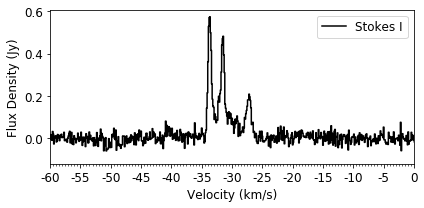

In [27]:
datacube = fits.open('Intersting.fits')
data = datacube[0].data
header = datacube[0].header
data.shape

print(datacube[0].header['CUNIT3'])
rp = datacube[0].header['CRPIX3']
rf = datacube[0].header['CRVAL3']
df = datacube[0].header['CDELT3']
nf = datacube[0].header['NAXIS3']
xvals = rf + df*(np.arange(nf)-rp)
#xvals are the frequency in Hz np.subtract(xvals,1.66555e+09)
xvals=xvals[0:2999]
#print xvals

vels=np.multiply(np.subtract(1.665402e+09,xvals),0.180012)
#Correct for m/s into km/s
vels=np.divide(vels,1000)

ra="16:40:12"
dec="-46:21:26"
c = SkyCoord(ra, dec, unit=(u.hourangle, u.deg))

w = wcs.WCS(header, naxis=2)
xpix,ypix=c.to_pixel(w,origin=0,mode='wcs')
xpix=int(xpix)
ypix=int(ypix)

print(xpix)
print(ypix)

signal=[]
for x in range(0, 2998):
    value = np.nanmean(data[x,ypix:ypix+1,xpix:xpix+1])
    #print value
    signal.append(value)
    
#Set the minor axis counters
majorLocator = MultipleLocator(5)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(0.5)

#bigfig=plt.figure(figsize=(20,12))
#Make a spectra        
#bigfig=plt.figure(figsize=(20,20))
#ax1=bigfig.add_subplot(111)
#axs[0]=bigfig.add_subplot(211)
#ax1.step(vels[0:2239],rhcp[0:2239],color='blue',label='RHCP')
#ax1.step(vels[0:2239],lhcp[0:2239],color='red',label='LHCP')
#ax1.step(vels[0:2998],signal[0:2998],color='black', label='Stokes I')
#ax1.step(xvals[0:2000],signal[0:2000],color='red')
#ax1.set_title("Pilot1665"+" RA="+ra+" Dec="+dec, fontsize=18)
#ax1.set_xlabel("LSR Velocity (km/s)",fontsize=18)
#ax1.set_xlabel("Velocity (km/s)",fontsize=18)
#ax1.set_xlim(-125,-80)
#ax1.set_ylabel("Flux Density (Jy)",fontsize=18)
#ax1.tick_params(labelsize=12, labelbottom=False)
#ax1.ticklabel_format(useOffset=False)
#ax1.xaxis.set_major_locator(majorLocator)
#ax1.xaxis.set_major_formatter(majorFormatter)
#plum_patch = mpatches.Patch(color='grey')
#ax1.fill_between(vels[0:3000], mean_sig-RMS, mean_sig+RMS, facecolor='grey', alpha=0.5)
#ax1.legend(fontsize=12)
#plt.grid(True)
bigfig=plt.figure(figsize=(6,3))
ax1=bigfig.add_subplot(111)
ax1.step(vels[0:2998],signal[0:2998],color='black', label="Stokes I")
#ax1.step(xvals[0:2000],signal[0:2000],color='red')
#ax1.set_title("Pilot1720"+" RA="+ra+" Dec="+dec, fontsize=24)
ax1.set_xlabel("Velocity (km/s)",fontsize=12)
ax1.set_xlim(-60,0)
ax1.set_ylabel("Flux Density (Jy)",fontsize=12)
ax1.tick_params(labelsize=12, labelbottom=True)
ax1.ticklabel_format(useOffset=False)
ax1.xaxis.set_major_locator(majorLocator)
ax1.xaxis.set_major_formatter(majorFormatter)
plum_patch = mpatches.Patch(color='grey', label='1$\sigma$')
#ax1.fill_between(vels[0:3000], mean_sig-RMS, mean_sig+RMS, facecolor='grey', alpha=0.5)
#ax1.legend(handles=[plum_patch],  loc=1,fontsize=24)

# for the minor ticks, use no labels; default NullFormatter
ax1.xaxis.set_minor_locator(minorLocator)
ax1.legend(fontsize=12)
plt.tight_layout()
#for ax in axs:
#    ax.label_outer()
#Save the figure.     
bigfig.savefig("InterestingSource.pdf", dpi=300)

Hz
65
65


Set OBSGEO-B to   -26.704100 from OBSGEO-[XYZ].
Set OBSGEO-H to      121.995 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


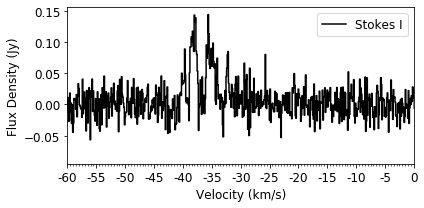

In [28]:
datacube = fits.open('Weak_Maser.fits')
data = datacube[0].data
header = datacube[0].header
data.shape

print(datacube[0].header['CUNIT3'])
rp = datacube[0].header['CRPIX3']
rf = datacube[0].header['CRVAL3']
df = datacube[0].header['CDELT3']
nf = datacube[0].header['NAXIS3']
xvals = rf + df*(np.arange(nf)-rp)
#xvals are the frequency in Hz np.subtract(xvals,1.66555e+09)
xvals=xvals[0:2999]
#print xvals

vels=np.multiply(np.subtract(1.665402e+09,xvals),0.180012)
#Correct for m/s into km/s
vels=np.divide(vels,1000)

ra="16:38:54"
dec="-46:42:57"
c = SkyCoord(ra, dec, unit=(u.hourangle, u.deg))

w = wcs.WCS(header, naxis=2)
xpix,ypix=c.to_pixel(w,origin=0,mode='wcs')
xpix=int(xpix)
ypix=int(ypix)

print(xpix)
print(ypix)

signal=[]
for x in range(0, 2998):
    value = np.nanmean(data[x,ypix:ypix+1,xpix:xpix+1])
    #print value
    signal.append(value)
    
#Set the minor axis counters
majorLocator = MultipleLocator(5)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(0.5)

#bigfig=plt.figure(figsize=(20,12))
#Make a spectra        
#bigfig=plt.figure(figsize=(20,20))
#ax1=bigfig.add_subplot(111)
#axs[0]=bigfig.add_subplot(211)
#ax1.step(vels[0:2239],rhcp[0:2239],color='blue',label='RHCP')
#ax1.step(vels[0:2239],lhcp[0:2239],color='red',label='LHCP')
#ax1.step(vels[0:2998],signal[0:2998],color='black', label='Stokes I')
#ax1.step(xvals[0:2000],signal[0:2000],color='red')
#ax1.set_title("Pilot1665"+" RA="+ra+" Dec="+dec, fontsize=18)
#ax1.set_xlabel("LSR Velocity (km/s)",fontsize=18)
#ax1.set_xlabel("Velocity (km/s)",fontsize=18)
#ax1.set_xlim(-125,-80)
#ax1.set_ylabel("Flux Density (Jy)",fontsize=18)
#ax1.tick_params(labelsize=12, labelbottom=False)
#ax1.ticklabel_format(useOffset=False)
#ax1.xaxis.set_major_locator(majorLocator)
#ax1.xaxis.set_major_formatter(majorFormatter)
#plum_patch = mpatches.Patch(color='grey')
#ax1.fill_between(vels[0:3000], mean_sig-RMS, mean_sig+RMS, facecolor='grey', alpha=0.5)
#ax1.legend(fontsize=12)
#plt.grid(True)
bigfig=plt.figure(figsize=(6,3))
ax1=bigfig.add_subplot(111)
ax1.step(vels[0:2998],signal[0:2998],color='black', label="Stokes I")
#ax1.step(xvals[0:2000],signal[0:2000],color='red')
#ax1.set_title("Pilot1720"+" RA="+ra+" Dec="+dec, fontsize=24)
ax1.set_xlabel("Velocity (km/s)",fontsize=12)
ax1.set_xlim(-60,0)
ax1.set_ylabel("Flux Density (Jy)",fontsize=12)
ax1.tick_params(labelsize=12, labelbottom=True)
ax1.ticklabel_format(useOffset=False)
ax1.xaxis.set_major_locator(majorLocator)
ax1.xaxis.set_major_formatter(majorFormatter)
plum_patch = mpatches.Patch(color='grey', label='1$\sigma$')
#ax1.fill_between(vels[0:3000], mean_sig-RMS, mean_sig+RMS, facecolor='grey', alpha=0.5)
#ax1.legend(handles=[plum_patch],  loc=1,fontsize=24)

# for the minor ticks, use no labels; default NullFormatter
ax1.xaxis.set_minor_locator(minorLocator)
ax1.legend(fontsize=12)
plt.tight_layout()
#for ax in axs:
#    ax.label_outer()
#Save the figure.     
bigfig.savefig("WeakSource.pdf", dpi=300,pad_inches=0.3)